<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
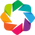

In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from matplotlib import colors
import pylab as pyl

import pywt
import scipy.io as sio
import pandas as pd
import holoviews as hv
import param
import panel as pn
from panel.pane import LaTeX

from PIL import Image
from io import BytesIO
import requests
import warnings
from ipywidgets import interact
hv.extension('bokeh')

# Partie 0: Récupération des données

In [246]:
data_pepsi = pd.read_csv("../databases/PEPSIR_raw_LF_perfect.csv", sep=";")
print('Pepsi -> Missing Data : ',data_pepsi.isna().sum().sum(), '  Shape is : ', data_pepsi.shape)
display(data_pepsi.head())



data_hydro = pd.read_csv("../databases/HYDROSWOT_100m_V3.csv", sep=";")
data_hydro.dropna(inplace=True)
print('Hydro -> Missing Data : ',data_hydro.isna().sum().sum(), '  Shape is : ', data_hydro.shape)
display(data_hydro.head())

Pepsi -> Missing Data :  0   Shape is :  (55525, 21)


,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


Hydro -> Missing Data :  0   Shape is :  (16603, 41)


,site_no,station_name,river,stream_type,lon,lat,flowacc,stage,W,dH,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.527048,125.8824,0.999744,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,76.172317
1,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,8.909304,152.0952,8.382000,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,1486.634446
2,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.271016,116.4336,0.743712,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,46.156460
3,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.752344,112.1664,2.225040,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,150.645624
4,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.173224,120.3960,1.645920,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,140.168391


**Suppression de certaines données**

In [247]:
data_hydro.drop(['LC1','LC2','LC3','LC4','LC5','LC6','LC7','LC8','LC9','LC10','LC11','LC12',
                 'Q5_GSCD','Q10_GSCD','Q20_GSCD','QMEAN_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD'],axis=1,inplace=True)

**Suppression des débits inférieurs à 100 $m^3/s$**

In [248]:
data_pepsi = data_pepsi.loc[data_pepsi['Q']>100]
data_hydro = data_hydro.loc[data_hydro['Q']>100]

**Suppresions des largeurs inférieures à 80m**

In [249]:
data_pepsi = data_pepsi.loc[data_pepsi['W']>80]
data_hydro = data_hydro.loc[data_hydro['W']>90]

**Mise à jour des noms de rivières**

In [265]:
data_hydro['river']= data_hydro['river'].str.upper()
data_hydro['river'] = data_hydro['river'].str.lstrip()
data_hydro['river'] = data_hydro['river'].str.rstrip()

In [8]:
print("Variables pepsi : " , data_pepsi.columns)
print("Variables hydro : " , data_hydro.columns)

Variables pepsi :  Index(['river', 'day', 'reach', 'lon', 'lat', 'flowacc', 'sinuosity',
       'meandwave', 'height', 'W', 'A', 'S', 'dA', 'K', 'A0', 'Abar', 'alpha',
       'beta', 'Fr', 'U', 'Q'],
      dtype='object')
Variables hydro :  Index(['site_no', 'station_name', 'river', 'stream_type', 'lon', 'lat',
       'flowacc', 'stage', 'W', 'dH', 'dA', 'U', 'A0', 'Abar', 'Amed', 'Sdem',
       'clay', 'sand', 'silt', 'PA', 'TA', 'Q'],
      dtype='object')


# <FONT COLOR="Red">Partie 1 : Statistiques descriptives</font> 

In [281]:
river_means_pepsi=data_pepsi.groupby("river", as_index=False).mean()
river_means_hydro=data_hydro.groupby("river", as_index=False).mean()

In [282]:
display("Pepsi", river_means_pepsi.describe())
display("Hydro", river_means_hydro.describe())

'Pepsi'

,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
count,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,145.767569,4.553993,-52.451062,39.075888,4.034065e+05,1.109080,4121.047504,98.886543,923.693334,4368.124929,0.000220,1640.065223,38.761811,2734.952825,4343.262963,45.290095,-0.057930,0.119973,0.750575,3996.479452
std,64.772077,2.291576,63.248068,6.062336,6.112239e+05,0.237712,7275.361681,82.970792,1803.236241,6988.037056,0.000536,3364.671422,13.258586,3954.565986,6928.906896,21.137938,0.234363,0.062612,0.287438,7052.546386
min,76.098807,1.998382,-121.994858,23.606131,8.484700e+03,1.001894,933.535217,3.333505,106.823067,214.244322,0.000008,55.278036,14.112584,91.393339,182.651849,12.587895,-0.568107,0.040108,0.273451,198.389412
25%,110.500000,2.959405,-89.424400,38.371399,2.855860e+04,1.001894,1096.933960,15.512602,225.778028,863.756084,0.000020,171.941158,32.904442,477.927053,856.679512,29.874705,-0.194647,0.072838,0.570230,503.491760
50%,110.500000,4.000000,-85.278900,38.738621,2.341812e+05,1.039897,2476.190674,95.227569,375.240450,1442.688253,0.000044,480.744766,37.755101,940.614231,1431.633018,42.864379,-0.018848,0.091728,0.724872,1033.050154
75%,183.000000,5.444444,1.439300,41.630207,2.341812e+05,1.112189,4400.909180,148.751418,654.147334,4957.478551,0.000194,862.883767,44.937547,4099.595052,4957.478551,56.790784,0.059561,0.174503,0.890953,3830.904487
max,298.000000,11.250000,91.975410,48.638222,2.361844e+06,2.244732,39357.117188,275.265129,9013.110585,35123.972858,0.002824,15093.801193,76.649548,19967.199390,34710.470485,98.593766,0.642209,0.239151,1.339772,31534.985385


'Hydro'

,site_no,lon,lat,flowacc,stage,W,dH,dA,U,A0,Abar,Amed,Sdem,clay,sand,silt,PA,TA,Q
count,1.330000e+02,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,4.206194e+10,-89.700229,38.694553,5.332572e+04,9.454388,225.785594,3.297674,568.369438,0.770544,305.371226,702.230973,576.945048,0.000679,19.082224,38.646598,42.270153,1036.482133,12.449894,645.227954
std,4.850139e+11,12.112155,5.252282,1.535838e+05,22.384395,157.502580,8.360665,1492.385223,0.294877,589.987204,1012.017500,958.688914,0.000978,4.737207,12.053439,10.192375,273.643662,4.592554,999.106177
min,1.012469e+06,-122.989000,28.360000,3.392884e+02,0.231648,96.316800,0.162560,17.763061,0.263347,5.645756,54.439180,24.194892,0.000000,7.181818,15.264463,13.165289,198.030808,2.794338,102.554840
25%,2.374250e+06,-94.800000,35.019322,5.951793e+03,2.453755,131.015232,1.203706,182.497677,0.566928,63.970379,274.425993,194.367111,0.000199,16.130435,28.433773,37.338843,905.222222,8.982182,311.093613
50%,5.366647e+06,-89.868682,38.660000,1.387975e+04,4.000718,164.338635,1.855998,273.934834,0.736092,129.258625,412.815287,335.426806,0.000409,18.854167,37.533898,42.657679,1068.649123,12.338559,420.284930
75%,7.250551e+06,-81.320676,42.090818,3.253740e+04,6.541389,247.771183,3.083300,466.076542,0.947928,287.070394,751.082723,586.442379,0.000891,21.913744,47.338843,49.515024,1187.499058,16.264390,636.758098
max,5.593459e+12,-68.150000,48.837429,1.367301e+06,164.476374,1002.890146,91.670124,13637.773873,1.763776,4190.959360,7663.379313,7052.958699,0.008336,32.933884,79.702479,61.995473,1634.444444,21.732312,7470.601293


**Nombre d'observations par rivières et par site**

In [284]:
hydro_by_site = data_hydro.groupby('site_no', as_index = False).describe()

In [272]:
categorie = np.array(hydro_by_site['site_no']['count'].to_list()).astype(int)

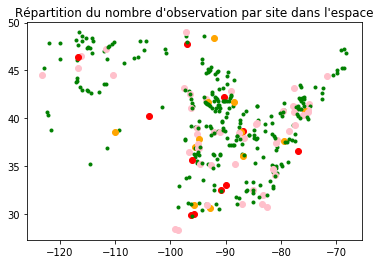

nombre de rivière par catégorie [ 11.  12.  50. 284.]


In [273]:
aux = np.zeros(4)
for i in range(0,len(categorie)):
    if categorie[i] >= 6 :
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], '.', color = 'g')
        aux[3]+= 1
    if categorie[i] == 1:
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], 'o', color = 'r')
        aux[0]+= 1
    if categorie[i] == 2:
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], 'o', color = 'orange')
        aux[1]+= 1
    if categorie[i] < 6 and categorie[i]>2 :
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], 'o', color = 'pink' )
        aux[2]+= 1

plt.title("Répartition du nombre d'observation par site dans l'espace")
plt.show()
print("nombre de rivière par catégorie", aux)

## 1.2 Boxplots

In [9]:
class Boxplot_hydro(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_hydro.columns)
    def view(self):
        affichage = hv.BoxWhisker(data_hydro, "river",self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)
    
class Boxplot_pepsi(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_pepsi.columns)
    def view(self):
        affichage = hv.BoxWhisker(data_pepsi, "river",self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)

In [10]:
boxplotH = Boxplot_hydro()
pn.Column(boxplotH.param,boxplotH.view)

Column
    [0] Column(margin=5, name='Boxplot_hydro', width=300)
        [0] StaticText(value='<b>Boxplot_hydro</b>')
        [1] Select(name='Variable', options=OrderedDict([('site_no', ...]), value='Q')
    [1] ParamMethod(method)

In [11]:
boxplotP = Boxplot_pepsi()
pn.Column(boxplotP.param,boxplotP.view)

Column
    [0] Column(margin=5, name='Boxplot_pepsi', width=300)
        [0] StaticText(value='<b>Boxplot_pepsi</b>')
        [1] Select(name='Variable', options=OrderedDict([('river', ...]), value='Q')
    [1] ParamMethod(method)

## 1.3 Corrélations

In [12]:
# Pour Pepsi
dataP = data_pepsi.drop(columns=['river', 'day','reach','U']) #remove site_no & station_name & U
corr = dataP.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,alpha,beta,Fr,Q
lon,1.000000,-0.211614,-0.148053,0.382034,0.262566,-0.629972,0.350079,0.311795,0.009389,0.293228,0.395090,0.244695,0.357230,0.357635,-0.117333,0.126622,0.288866
lat,-0.211614,1.000000,-0.386795,0.297858,-0.392643,-0.007181,-0.509089,-0.582771,0.143544,-0.423700,-0.522372,-0.616693,-0.671259,-0.519181,0.172397,0.035295,-0.515565
flowacc,-0.148053,-0.386795,1.000000,-0.203561,0.314526,0.444914,0.329600,0.409006,-0.117351,0.290605,0.239488,0.440935,0.472079,0.310078,-0.259154,0.189468,0.401895
sinuosity,0.382034,0.297858,-0.203561,1.000000,-0.001933,-0.374929,-0.090735,-0.140904,0.034973,-0.051616,0.045630,-0.214347,-0.162690,0.133270,-0.129910,0.270813,-0.094383
meandwave,0.262566,-0.392643,0.314526,-0.001933,1.000000,-0.079633,0.328790,0.301343,-0.016412,0.328549,0.225143,0.183122,0.349859,0.166288,-0.042724,0.315774,0.378971
height,-0.629972,-0.007181,0.444914,-0.374929,-0.079633,1.000000,-0.182646,-0.177196,-0.025970,-0.154377,-0.133176,-0.153939,-0.207865,0.019657,-0.321207,0.149696,-0.157335
W,0.350079,-0.509089,0.329600,-0.090735,0.328790,-0.182646,1.000000,0.926709,-0.077262,0.900713,0.474360,0.690656,0.750138,0.339153,-0.077852,0.096948,0.903374
A,0.311795,-0.582771,0.409006,-0.140904,0.301343,-0.177196,0.926709,1.000000,-0.143375,0.901172,0.549451,0.834676,0.867810,0.396667,-0.074280,-0.015962,0.940433
S,0.009389,0.143544,-0.117351,0.034973,-0.016412,-0.025970,-0.077262,-0.143375,1.000000,-0.065743,-0.401191,-0.199466,-0.169225,-0.303994,0.078304,0.544273,-0.103195
dA,0.293228,-0.423700,0.290605,-0.051616,0.328549,-0.154377,0.900713,0.901172,-0.065743,1.000000,0.355923,0.513549,0.595725,0.273917,-0.072796,0.137252,0.927921


In [13]:
# Pour Hydro
dataH = data_hydro.drop(columns=['site_no', 'river','station_name','stream_type' ,'U']) #remove site_no & station_name & U
corr = dataP.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,alpha,beta,Fr,Q
lon,1.000000,-0.211614,-0.148053,0.382034,0.262566,-0.629972,0.350079,0.311795,0.009389,0.293228,0.395090,0.244695,0.357230,0.357635,-0.117333,0.126622,0.288866
lat,-0.211614,1.000000,-0.386795,0.297858,-0.392643,-0.007181,-0.509089,-0.582771,0.143544,-0.423700,-0.522372,-0.616693,-0.671259,-0.519181,0.172397,0.035295,-0.515565
flowacc,-0.148053,-0.386795,1.000000,-0.203561,0.314526,0.444914,0.329600,0.409006,-0.117351,0.290605,0.239488,0.440935,0.472079,0.310078,-0.259154,0.189468,0.401895
sinuosity,0.382034,0.297858,-0.203561,1.000000,-0.001933,-0.374929,-0.090735,-0.140904,0.034973,-0.051616,0.045630,-0.214347,-0.162690,0.133270,-0.129910,0.270813,-0.094383
meandwave,0.262566,-0.392643,0.314526,-0.001933,1.000000,-0.079633,0.328790,0.301343,-0.016412,0.328549,0.225143,0.183122,0.349859,0.166288,-0.042724,0.315774,0.378971
height,-0.629972,-0.007181,0.444914,-0.374929,-0.079633,1.000000,-0.182646,-0.177196,-0.025970,-0.154377,-0.133176,-0.153939,-0.207865,0.019657,-0.321207,0.149696,-0.157335
W,0.350079,-0.509089,0.329600,-0.090735,0.328790,-0.182646,1.000000,0.926709,-0.077262,0.900713,0.474360,0.690656,0.750138,0.339153,-0.077852,0.096948,0.903374
A,0.311795,-0.582771,0.409006,-0.140904,0.301343,-0.177196,0.926709,1.000000,-0.143375,0.901172,0.549451,0.834676,0.867810,0.396667,-0.074280,-0.015962,0.940433
S,0.009389,0.143544,-0.117351,0.034973,-0.016412,-0.025970,-0.077262,-0.143375,1.000000,-0.065743,-0.401191,-0.199466,-0.169225,-0.303994,0.078304,0.544273,-0.103195
dA,0.293228,-0.423700,0.290605,-0.051616,0.328549,-0.154377,0.900713,0.901172,-0.065743,1.000000,0.355923,0.513549,0.595725,0.273917,-0.072796,0.137252,0.927921


## 1.4 Analyse en composantes principales

In [193]:
pca_hydro = PCA()
pca_pepsi = PCA()

In [194]:
# On retire les variables qualitatives + Q
data_pepsi_ACP = data_pepsi.drop(['river','day','reach','Q'],axis=1)
data_hydro_ACP = data_hydro.drop(['site_no','station_name','river','stream_type','Q'],axis=1)

In [195]:
# On scale 
pepsiR = pd.DataFrame(scale(data_pepsi_ACP), columns = data_pepsi_ACP.columns)
hydroR = pd.DataFrame(scale(data_hydro_ACP), columns = data_hydro_ACP.columns)

C_pepsi = pca_pepsi.fit(pepsiR).transform(pepsiR)
C_hydro = pca_hydro.fit(hydroR).transform(hydroR)

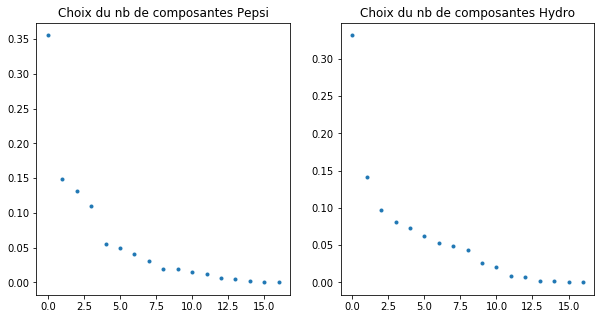

In [196]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(pca_pepsi.explained_variance_ratio_,'.')
axs[0].set_title("Choix du nb de composantes Pepsi")

axs[1].plot(pca_hydro.explained_variance_ratio_,'.')
axs[1].set_title("Choix du nb de composantes Hydro")

plt.show()

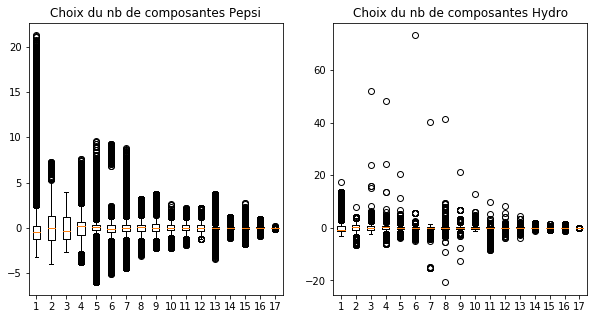

In [197]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].boxplot(C_pepsi)
axs[0].set_title("Choix du nb de composantes Pepsi")

axs[1].boxplot(C_hydro)
axs[1].set_title("Choix du nb de composantes Hydro")

plt.show()

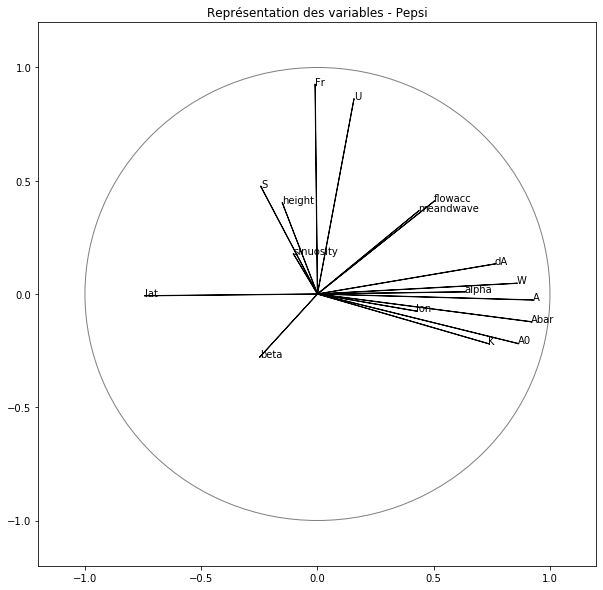

In [198]:
## coordonnées et représentation des variables => dim 1 en fonction de dim 2 
coord1=pca_pepsi.components_[0]*np.sqrt(pca_pepsi.explained_variance_[0])
coord2=pca_pepsi.components_[1]*np.sqrt(pca_pepsi.explained_variance_[1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_pepsi_ACP.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.title("Représentation des variables - Pepsi")
plt.show()

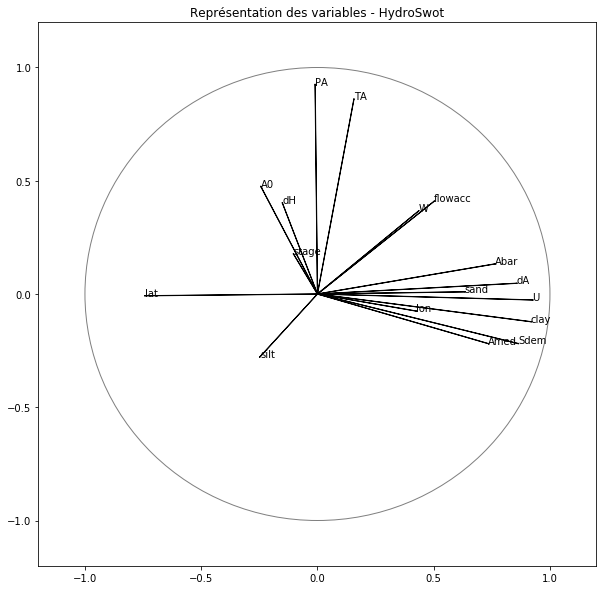

In [199]:
## coordonnées et représentation des variables
coord1_H=pca_hydro.components_[0]*np.sqrt(pca_hydro.explained_variance_[0])
coord2_H=pca_hydro.components_[1]*np.sqrt(pca_hydro.explained_variance_[1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_hydro_ACP.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.title("Représentation des variables - HydroSwot")
ax.add_patch(c)
plt.show()

# <FONT COLOR="Red">Partie 2 : Classification</font> 

## 2.1 Classification de HydroSwot

### 2.1.1 Classification "à la main"

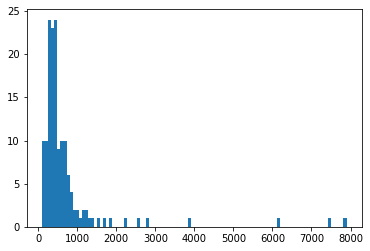

In [127]:
plt.figure()
river_means_hydro=data_hydro.groupby("river", as_index=False).mean()
plt.hist(river_means_hydro['Q'],bins=100)
plt.show()

On remarque déja 2 groupes, rivières dont la moyenne de débit < 3000 et celles avec un énorme débit. On peut également distinguer 3 groupes : $[100,1000] , [1000,3000] , [3000,8000]$. 

In [200]:
# 2 classes
lim = 1000
c1 = river_means_hydro[river_means_hydro['Q']<=lim]
c2 = river_means_hydro[river_means_hydro['Q']>lim]

On cherche d'autres variables réalisant la même séparation en classes que le débit 

In [201]:
class Histo_classe_hydro(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_hydro.columns)
    def view(self):
        bins1 = int((len(c1)+len(c2))/len(c1)*10)
        bins2 = int((len(c1)+len(c2))/len(c2)*10)
        a1,a2 = np.histogram(c1[self.variable],bins1)
        b1,b2 = np.histogram(c2[self.variable], bins2)
        affichage1 = hv.Histogram((a2,a1)).opts(width=900, color = 'r')
        affichage2 = hv.Histogram((b2,b1)).opts(width=900, color = 'g')
        
        return pn.Row(affichage1*affichage2)
    
Histo_classeH = Histo_classe_hydro()
pn.Column(Histo_classeH.param,Histo_classeH.view)

Column
    [0] Column(margin=5, name='Param15369', width=300)
        [0] StaticText(value='<b>Histo_classe_hydro</b>...)
        [1] Select(name='Variable', options=OrderedDict([('site_no', ...]), value='Q')
    [1] ParamMethod(method)

### 2.1.2 Classification supervisée par K-means

**Principe :**

On détermine tout d'abord un nombre $k$ de classe . 
   1. Initialisation aléatoire des centres de classes
   2. On tire k individus qui sont affectés à la classe dont le centre est le plus proche au sens de la métrique euclidienne choisie. 
   3. Calcul du centre de gravité de chaque classe
   4. On répète 2. et 3. jusqu'à convergence de l'algorithme

Cela permet de maximiser la variance inter-classe et minimiser la variance intra-classe. 
 
(Métrique utilisée : métrique de Mahalanobis - inverse de la matrice variance-covariance)

(117, 17)


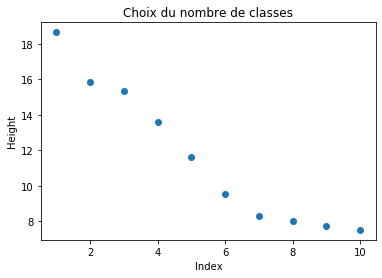

In [285]:
hydroRech = hydroR[::100] # Tirage d'un sous-échantillon des pixels
print(hydroRech.shape)
Z = linkage(hydroRech, method = 'complete', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(10) + 1

height = sorted(height, reverse = True)

plt.scatter(x,height[0:10]) 
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show()

#### 2.1.2.1 2 classes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220D8DF1DC8>]],
      dtype=object)

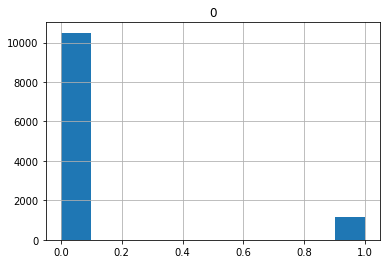

In [286]:
hydroCP =C_hydro[:,0:2]
n_classes = 2
kmeans_hydro = KMeans(n_clusters = n_classes, random_state = 0, n_jobs = -1).fit(hydroCP)
kclassesACP_hydro_2 = kmeans_hydro.labels_
# effectifs des classes
pd.DataFrame(kclassesACP_hydro_2).hist()

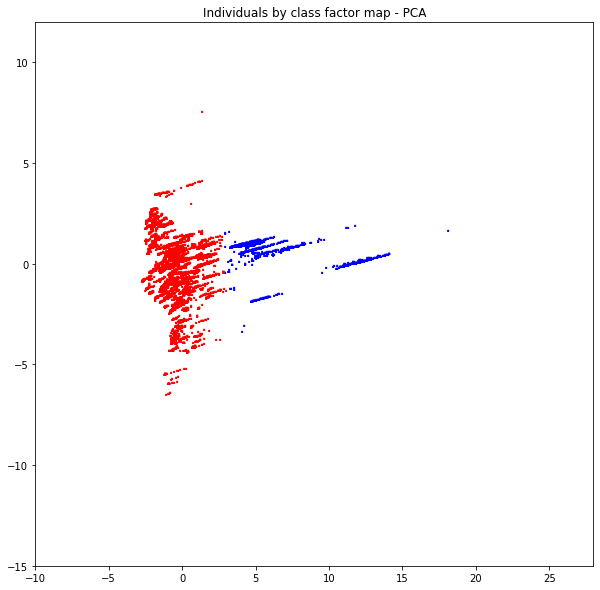

In [27]:
pc1 = C_hydro[:,0]
pc2 = C_hydro[:,1]
coul = ['b', 'r']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_hydro_2):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA')
plt.show()

#### 2.1.2.2 3 classes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220D8DF1788>]],
      dtype=object)

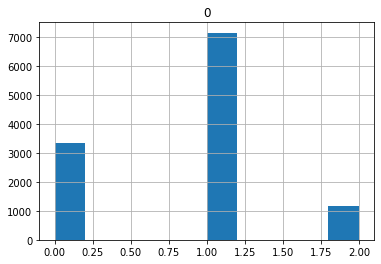

In [287]:
hydroCP =C_hydro[:,0:2]
n_classes = 3
kmeans_hydro = KMeans(n_clusters = n_classes, random_state = 0, n_jobs = -1).fit(hydroCP)
kclassesACP_hydro_3 = kmeans_hydro.labels_
# effectifs des classes
pd.DataFrame(kclassesACP_hydro_3).hist()

In [ ]:
coul = ['b', 'r', 'g']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_hydro_3):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA')
plt.show()

#### Comparaison entre 2 et 3 classes

In [288]:
data_hydro_classe = data_hydro
data_hydro_classe['2_classes'] = kclassesACP_hydro_2
data_hydro_classe['3_classes'] = kclassesACP_hydro_3

In [225]:
class Boxplot_hydro_classe(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_hydro_classe.columns)
    nb_classe = param.ObjectSelector(default="2_classes",objects=['2_classes','3_classes'])
    def view(self):
        affichage = hv.BoxWhisker(data_hydro_classe, self.nb_classe,self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)
Boxplot_classe_H = Boxplot_hydro_classe()
pn.Column(Boxplot_classe_H.param,Boxplot_classe_H.view)

Column
    [0] Column(margin=5, name='Param18575', width=300)
        [0] StaticText(value='<b>Boxplot_hydro_classe</...)
        [1] Select(name='Variable', options=OrderedDict([('site_no', ...]), value='Q')
        [2] Select(name='Nb classe', options=OrderedDict([('2_classes',...]), value='2_classes')
    [1] ParamMethod(method)

In [293]:
display(data_hydro_classe[data_hydro_classe['3_classes']==0]['river'].unique())
display(data_hydro_classe[data_hydro_classe['3_classes']==1]['river'].unique())
display(data_hydro_classe[data_hydro_classe['3_classes']==2]['river'].unique())

array(['TALLAPOOSA', 'ALABAMA', 'COOSA', 'CONECUH', 'MOBILE', 'ARKANSAS',
       'RED', 'WHITE', 'ARK', 'BLACK', 'TOMBIGBEE', 'COLORADO',
       'SACRAMENTO', 'OCMULGEE', 'ALTAMAHA', 'CHATTAHOOCHEE', 'SAVANNAH',
       'LITTLE', 'SUWANNEE', 'FLINT', 'WABASH', 'EAST FORK WHITE',
       'SPRING', 'KENTUCKY', 'GREEN', 'FLOODWAY AT ARKANSAS', 'OUACHITA',
       'OHIO', 'CUMBERLAND', 'POTOMAC', 'BAYOU ANACOCO', 'ANDROSCOGGIN',
       'CALCASIEU', 'KENNEBEC', 'PISCATAQUIS', 'PENOBSCOT', 'CONNECTICUT',
       'MISSISSIPPI', 'YAZOO', 'BIG BLACK', 'SOUTH PLATTE', 'DELAWARE',
       'CHEMUNG', 'HUDSON', 'CHENANGO', 'SUSQUEHANNA', 'OSWEGO',
       'GENESEE', 'CAPE FEAR', 'PEE DEE', 'MUSKINGUM', 'SCIOTO',
       'VERDIGRIS', 'NEOSHO', 'POTEAU', 'DEEP FORK', 'CANADIAN',
       'ILLINOIS', 'WEST BRANCH SUSQUEHANNA', 'WB SUSQUEHANNA',
       'SCHUYLKILL', 'ALLEGHENY', 'LEHIGH', 'JUNIATA', 'CATAWBA',
       'WATEREE', 'BROAD', 'CONGAREE', 'TENNESSEE', 'HIWASSEE', 'VILLAGE',
       'FRENCH BROAD', 'HAR

array(['SNAKE', 'COLORADO', 'SACRAMENTO', 'SOUTH PLATTE', 'SPOKANE',
       'PEND OREILLE', 'KOOTENAI', 'CLARK FORK', 'WABASH', 'CLEARWATER',
       'WHITE', 'WAPSIPINICON', 'BEAVER', 'MISSISSIPPI', 'IOWA',
       'DES MOINES', 'MISSOURI', 'CEDAR', 'SOUTH SKUNK', 'SKUNK',
       'BIG SIOUX', 'MAQUOKETA', 'POTTAWATOMIE', 'KANSAS', 'NEOSHO',
       'GREEN', 'MARMATON', 'OHIO', 'ST. JOHN', 'AROOSTOOK', 'RAINY',
       'NAMAKAN', 'MINNESOTA', 'ST. CROIX', 'OSAGE', 'YELLOWSTONE',
       'PLATTE', 'FLATHEAD', 'RED', 'GREAT MIAMI', 'VERDIGRIS',
       'WILLAMETTE', 'AUGLAIZE', 'MAUMEE', 'SUSQUEHANNA', 'YOUGHIOGHENY',
       'ALLEGHENY', 'JAMES', 'SNOHOMISH', 'YAKIMA', 'FOX', 'CHELAN',
       'CHIPPEWA', 'WISCONSIN', 'ROCK', 'ILLINOIS'], dtype=object)

array(['ARKANSAS', 'WABASH', 'MISSISSIPPI', 'IOWA', 'NEOSHO', 'VERDIGRIS',
       'OHIO', 'ATCHAFALAYA', 'SUSQUEHANNA', 'TENNESSEE', 'VILLAGE',
       'CYPRESS', 'WISCONSIN', 'ILLINOIS'], dtype=object)

    - Quand on fait 2 classes, Arkansas, Mississipi, Iowa, Neosho, Ohio, ... (la majorité des rivières présentes dans la classe 1) sont dans la classe 0 aussi.
 

## 2.2 Classification de Pepsi

In [299]:
""" PepsiRech = pepsiR[::100] # Tirage d'un sous-échantillon des pixels

Z = linkage(PepsiRech, method = 'complete', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(10) + 1

height = sorted(height, reverse = True)

plt.scatter(x,height[0:10]) 
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show() """

' PepsiRech = pepsiR[::100] # Tirage d\'un sous-échantillon des pixels\n\nZ = linkage(PepsiRech, method = \'complete\', metric = \'euclidean\') # choix de la distance\nheight = Z[:, 2]  # Décroissance des sauts\nx = np.arange(10) + 1\n\nheight = sorted(height, reverse = True)\n\nplt.scatter(x,height[0:10]) \nplt.xlabel(\'Index\')\nplt.ylabel(\'Height\')\nplt.title("Choix du nombre de classes")\nplt.show() '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220DE2CF588>]],
      dtype=object)

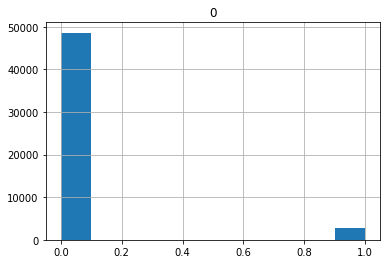

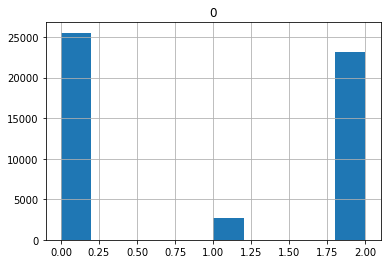

In [298]:
pepsiCP =C_pepsi[:,0:2]

kmeans_pepsi2 = KMeans(n_clusters = 2, random_state = 0, n_jobs = -1).fit(pepsiCP)
kclassesACP_pepsi_2 = kmeans_pepsi2.labels_

kmeans_pepsi3 = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1).fit(pepsiCP)
kclassesACP_pepsi_3 = kmeans_pepsi3.labels_
# effectifs des classes

pd.DataFrame(kclassesACP_pepsi_2).hist()

pd.DataFrame(kclassesACP_pepsi_3).hist()

In [ ]:
pc1 = C_pepsi[:,0]
pc2 = C_pepsi[:,1]
coul = ['b', 'r']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_pepsi_2):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA - pepsi')
plt.show()

In [ ]:
coul = ['b', 'r','g']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_pepsi_3):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA - pepsi')
plt.show()

In [300]:
data_pepsi_classe = data_pepsi
data_pepsi_classe['2_classes'] = kclassesACP_pepsi_2
data_pepsi_classe['3_classes'] = kclassesACP_pepsi_3

In [301]:
class Boxplot_pepsi_classe(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_pepsi_classe.columns)
    nb_classe = param.ObjectSelector(default="2_classes",objects=['2_classes','3_classes'])
    def view(self):
        affichage = hv.BoxWhisker(data_pepsi_classe, self.nb_classe,self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)
Boxplot_classe_P = Boxplot_pepsi_classe()
pn.Column(Boxplot_classe_P.param,Boxplot_classe_P.view)

Column
    [0] Column(margin=5, name='Param18826', width=300)
        [0] StaticText(value='<b>Boxplot_pepsi_classe</...)
        [1] Select(name='Variable', options=OrderedDict([('river', ...]), value='Q')
        [2] Select(name='Nb classe', options=OrderedDict([('2_classes',...]), value='2_classes')
    [1] ParamMethod(method)

In [302]:
display(data_pepsi_classe[data_pepsi_classe['3_classes']==0]['river'].unique())
display(data_pepsi_classe[data_pepsi_classe['3_classes']==1]['river'].unique())
display(data_pepsi_classe[data_pepsi_classe['3_classes']==2]['river'].unique())

array(['Connecticut', 'Cumberland', 'GaronneDownstream',
       'GaronneUpstream', 'Kanawha', 'Ohio', 'Po', 'SacramentoDownstream',
       'SacramentoUpstream', 'Seine', 'Wabash', 'IowaRiver', 'Kushiyara',
       'OhioSection1', 'OhioSection2', 'OhioSection3', 'OhioSection4',
       'OhioSection5', 'OhioSection7', 'OhioSection8', 'SeineDownstream',
       'SeineUpstream'], dtype=object)

array(['MississippiDownstream', 'Jamuna', 'Padma'], dtype=object)

array(['Connecticut', 'Cumberland', 'GaronneDownstream',
       'GaronneUpstream', 'Kanawha', 'MississippiDownstream',
       'MississippiUpstream', 'Ohio', 'Po', 'SacramentoDownstream',
       'SacramentoUpstream', 'Wabash', 'IowaRiver', 'Jamuna', 'Kushiyara',
       'MissouriDownstream', 'MissouriMidsection', 'MissouriUpstream',
       'OhioSection1', 'OhioSection2', 'OhioSection3', 'OhioSection4',
       'OhioSection5', 'OhioSection7', 'OhioSection8'], dtype=object)

# <FONT COLOR="Red">Partie 3 : Réseaux de neuronnes ANN</font> 

In [30]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from plot_keras_history import plot_history
import warnings
import random
#from keras import backend as K
#import tensorflow_probability as tfp

# 3.1 ANN HydroSwot

In [34]:
data_hydro.reset_index(inplace=True,drop=True) 
print("New data shape : ", data_hydro.shape)

New data shape :  (12205, 41)


### 3.1.1 Supression des rivières à 1 observation

In [38]:
rivers=river_means_hydro['river'].tolist()
r = []
for i in range(np.shape(rivers)[0]):
    if (np.shape(data_hydro[data_hydro['river']==rivers[i]])[0] < 2):
        r.append(rivers[i])
        print(rivers[i])
        
data_hydro=data_hydro[~data_hydro.river.isin(r)]
data_hydro.reset_index(inplace=True,drop=True)
print("New shape sans les rivières à 1 seule observations : ", data_hydro.shape)

Cypress
EAST FORK WHITE
G Miami
Maquoketa
Mill
NOTTOWAY
SOUTH PLATTE
New shape sans les rivières à 1 seule observations :  (12198, 41)


### 3.1.2 Séparer en classes de rivières

In [53]:
river_hydro_LQ = river_means_hydro[river_means_hydro['Q']<=1000]
data_hydro_LQ= data_hydro[data_hydro.river.isin(river_hydro_LQ.river.to_list())]

river_hydro_HQ = river_means_hydro[river_means_hydro['Q']>1000]
river_hydro_HQ = river_hydro_HQ[river_hydro_HQ['Q']<=5000]
data_hydro_HQ = data_hydro[data_hydro.river.isin(river_hydro_HQ.river.to_list())]

river_hydro_VHQ = river_means_hydro[river_means_hydro['Q']>5000]
data_hydro_VHQ = data_hydro[data_hydro.river.isin(river_hydro_VHQ.river.to_list())]


print("Shape de Low Q (<1000): " ,data_hydro_LQ.shape)
print("Shape de High Q (entre 1000 et 5000): " ,data_hydro_HQ.shape)
print("Shape de Very High Q (>5000): " ,data_hydro_VHQ.shape)

Shape de Low Q (<1000):  (7152, 41)
Shape de High Q (entre 1000 et 5000):  (3749, 41)
Shape de Very High Q (>5000):  (1297, 41)


### 3.1.3 Choisir les données

In [44]:
to_drop = ['stream_type','A0','Abar','Amed','Sdem','stage','dA','site_no','lon','lat','station_name','U', 'Q5_GSCD','Q10_GSCD','Q20_GSCD','QMEAN_GSCD','Q80_GSCD','Q90_GSCD',
           'Q95_GSCD','LC1','LC2','LC3','LC4','LC5','LC6','LC7','LC8','LC9','LC10','LC11','LC12','clay','sand','silt','PA','TA']

hydro_LQ = data_hydro_LQ.drop(to_drop,axis=1)
hydro_HQ = data_hydro_HQ.drop(to_drop,axis=1)
hydro_VHQ = data_hydro_VHQ.drop(to_drop,axis=1)

print(" Variables gardées : ", hydro_LQ.columns.to_list())
print('Missing Data : ',hydro_LQ.isna().sum().sum(), '  Shape is : ', hydro_LQ.shape)
print('Missing Data : ',hydro_HQ.isna().sum().sum(), '  Shape is : ', hydro_HQ.shape)
print('Missing Data : ',hydro_VHQ.isna().sum().sum(), '  Shape is : ', hydro_VHQ.shape)

 Variables gardées :  ['river', 'flowacc', 'W', 'dH', 'Q']
Missing Data :  0   Shape is :  (7152, 5)
Missing Data :  0   Shape is :  (3749, 5)
Missing Data :  0   Shape is :  (1297, 5)


### 3.1.4 Échantillons train et test

In [133]:
# ---- Suffle and Split => train, test
def shuffle_river(data,river):
    
    #nombre d'individus dans les 20%
    n20 = data.shape[0]*0.15
    n30 = data.shape[0]*0.25
    

    #Sélection rivière par rivière
    rivers=river['river'].tolist()
    #print("Nb de rivières : ", len(rivers))
    data_test=pd.DataFrame(None)
    
    while(data_test.shape[0]<n20):
    
        randomRiver=random.choice(rivers)
        if pd.concat([data_test,data[data['river']==randomRiver]]).shape[0] <n30: 
            data_test= pd.concat([data_test,data[data['river']==randomRiver]])
            rivers.remove(randomRiver)
        
        #print(data_test.shape[0])
    rivers=river['river'].tolist()
    
    data_train=pd.concat([data, data_test]).drop_duplicates(keep=False)
    
    data_test=data_test.drop('river', axis=1)
    data_train=data_train.drop('river', axis=1)

    # ---- Split => x,y
    
    x_train = data_train.drop('Q',  axis=1)
    y_train = data_train['Q'] 
    x_test  = data_test.drop('Q',   axis=1)
    y_test  = data_test['Q']


    print('Original data shape was : ',data.shape)
    print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
    print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)
    
    return x_train, y_train , x_test, y_test

### 3.1.5 Normalisation des données

In [46]:
def normalization(x_train,y_train,x_test,y_test):
    #display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

    mean = x_train.mean()
    std  = x_train.std()
    x_train = (x_train - mean) / std
    x_test  = (x_test  - mean) / std

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test,  y_test  = np.array(x_test),  np.array(y_test)
    return x_train, y_train , x_test, y_test

### 3.1.6 Construction du modèle

In [50]:
def get_model(shape,n_layers,n_neurons): 
    
    # shape : nb de variables explicatives 
    # n_layers : nb de couches
    # n_neurons : neurons/ couche
   
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape))
    
    for i in range(n_layers): 
            model.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mae',
                  metrics   = ['mae', 'mse'] )
    return model

### 3.1.7 Entrainement du modèle

In [ ]:
shape = 3
n_layers = 64
n_neurons = 64

In [138]:
model_LQ=get_model((shape,),n_layers,n_neurons)

In [139]:
model_HQ=get_model((shape,),n_layers,n_neurons)

In [140]:
model_VHQ=get_model((shape,),n_layers,n_neurons)

### 3.1.8 Création des échantillons

In [137]:
print("Classe LQ : ") 
x_hydro_LQ_train, y_hydro_LQ_train , x_hydro_LQ_test, y_hydro_LQ_test = shuffle_river(hydro_LQ,river_hydro_LQ)
x_hydro_LQ_train, y_hydro_LQ_train , x_hydro_LQ_test, y_hydro_LQ_test = normalization(x_hydro_LQ_train, y_hydro_LQ_train , x_hydro_LQ_test, y_hydro_LQ_test)

print("Classe HQ : ")
x_hydro_HQ_train, y_hydro_HQ_train , x_hydro_HQ_test, y_hydro_HQ_test = shuffle_river(hydro_HQ,river_hydro_HQ)
x_hydro_HQ_train, y_hydro_HQ_train , x_hydro_HQ_test, y_hydro_HQ_test = normalization(x_hydro_HQ_train, y_hydro_HQ_train , x_hydro_HQ_test, y_hydro_HQ_test)

print("Classe VHQ : ") 
x_hydro_VHQ_train, y_hydro_VHQ_train , x_hydro_VHQ_test, y_hydro_VHQ_test = shuffle_river(hydro_VHQ,river_hydro_VHQ)
x_hydro_VHQ_train, y_hydro_VHQ_train , x_hydro_VHQ_test, y_hydro_VHQ_test = normalization(x_hydro_VHQ_train, y_hydro_VHQ_train , x_hydro_VHQ_test, y_hydro_VHQ_test)

Classe LQ : 
Original data shape was :  (7152, 5)
x_train :  (5755, 3) y_train :  (5755,)
x_test  :  (1103, 3) y_test  :  (1103,)
Classe HQ : 
Original data shape was :  (3749, 5)
x_train :  (3154, 3) y_train :  (3154,)
x_test  :  (595, 3) y_test  :  (595,)
Classe VHQ : 
Original data shape was :  (1297, 5)
x_train :  (995, 3) y_train :  (995,)
x_test  :  (302, 3) y_test  :  (302,)


### 3.1.9 Apprentissage 

In [141]:
ep = 100
history_LQ = model_LQ.fit(x_hydro_LQ_train,  y_hydro_LQ_train, epochs = ep, batch_size = 100, verbose = 0, 
                    validation_data = (x_hydro_LQ_test, y_hydro_LQ_test))

In [142]:
ep = 100
history_HQ = model_HQ.fit(x_hydro_HQ_train,  y_hydro_HQ_train, epochs = ep, batch_size = 100, verbose = 0, 
                    validation_data = (x_hydro_HQ_test, y_hydro_HQ_test))

In [143]:
ep = 100
history_VHQ = model_VHQ.fit(x_hydro_VHQ_train,  y_hydro_VHQ_train, epochs = ep, batch_size = 100, verbose = 0, 
                    validation_data = (x_hydro_VHQ_test, y_hydro_VHQ_test))

### 3.1.10 Résultats

In [77]:
h_LQ=pd.DataFrame(data=history_LQ.history)
h_HQ=pd.DataFrame(data=history_HQ.history)
h_VHQ=pd.DataFrame(data=history_VHQ.history)

#### Pour LQ 

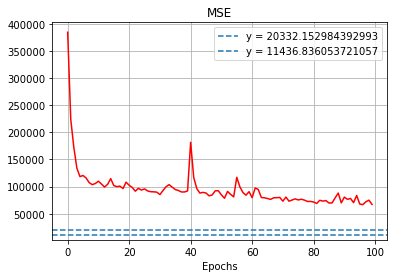

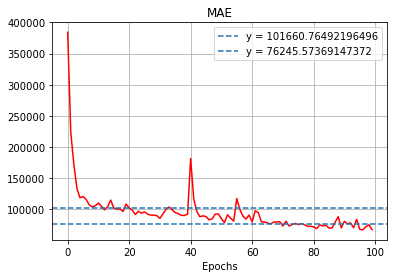

In [144]:
# Métriques 

plt.plot(h_LQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_hydro_LQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_hydro_LQ_train**2)))
plt.axhline(np.mean(y_hydro_LQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_hydro_LQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(h_LQ['mse'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_hydro_LQ_train**2),ls='--',label='y = ' +str(0.2*np.mean(y_hydro_LQ_train**2)))
plt.axhline(0.15*np.mean(y_hydro_LQ_train**2),ls='--',label='y = ' +str(0.15*np.mean(y_hydro_LQ_train**2)))
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Vérification des prédictions
plt.figure(figsize=(10,10))
plt.plot(y_test,model.predict(x_test),'bo',label='Prédictions sur test')
u = min(y_test)
m = max(y_test)
x = np.arange(0,m)
plt.plot(x,x,'r')
#plt.plot(x,x+0.20*x,'--g')
#plt.plot(x,x-0.20*x,'--g')
#plt.xlim(0,5000)
plt.legend()
plt.grid()
plt.show()

#### Pour HQ 

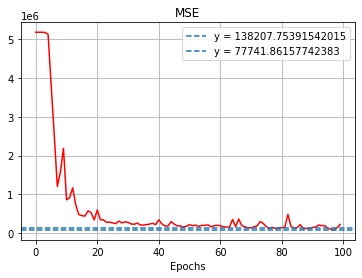

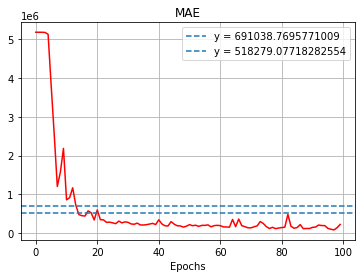

In [145]:
plt.plot(h_HQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_hydro_HQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_hydro_HQ_train**2)))
plt.axhline(np.mean(y_hydro_HQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_hydro_HQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(h_HQ['mse'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_hydro_HQ_train**2),ls='--',label='y = ' +str(0.2*np.mean(y_hydro_HQ_train**2)))
plt.axhline(0.15*np.mean(y_hydro_HQ_train**2),ls='--',label='y = ' +str(0.15*np.mean(y_hydro_HQ_train**2)))
plt.legend()
plt.grid()
plt.show()

#### Pour VHQ 

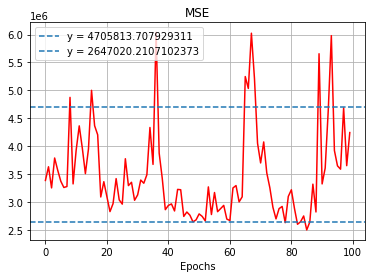

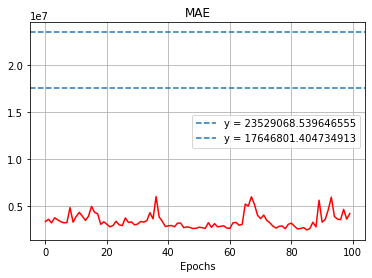

In [146]:
plt.plot(h_VHQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_hydro_VHQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_hydro_VHQ_train**2)))
plt.axhline(np.mean(y_hydro_VHQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_hydro_VHQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(h_VHQ['mse'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_hydro_VHQ_train**2),ls='--',label='y = ' +str(0.2*np.mean(y_hydro_VHQ_train**2)))
plt.axhline(0.15*np.mean(y_hydro_VHQ_train**2),ls='--',label='y = ' +str(0.15*np.mean(y_hydro_VHQ_train**2)))
plt.legend()
plt.grid()
plt.show()

# <FONT COLOR="Red">Partie 4 : Réseaux de neuronnes LSTM</font> 